#### Carregando as importações

In [1]:
import import_ipynb
from preprocessing_RGB import *
from imports.imports_common_models_DL import *
from imports.imports_common_metrics import *

importing Jupyter notebook from preprocessing_RGB.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common_preprocessing.ipynb
importing Jupyter notebook from load_dataset_RGB.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common.ipynb
X:  6400
X_train:  4480
X_test:  1280
X_val:  640
(array(['Mild_Demented', 'Moderate_Demented', 'Non_Demented',
       'Very_Mild_Demented'], dtype='<U18'), array([ 627,   45, 2240, 1568], dtype=int64))
(array([0, 1, 2, 3], dtype=int64), array([ 627,   45, 2240, 1568], dtype=int64))
(array(['Mild_Demented', 'Moderate_Demented', 'Non_Demented',
       'Very_Mild_Demented'], dtype='<U18'), array([179,  13, 640, 448], dtype=int64))
(array([0, 1, 2, 3]), array([179,  13, 640, 448], dtype=int64))
(array([0, 1, 2, 3]), array([179,  13, 640, 448], dtype=int64))
Unique Values: [0 1 2 3]
Frequency Values:

c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common_metrics.ipynb


In [2]:
Modelos =  []
Loss = []
Acuracia =  []
Precisao = []
Revocacao =  []
F1_score =  []

In [3]:
# Define a arquitetura da CNN
model_1 = Sequential([
    Conv2D(25, (3, 3), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

In [4]:
model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = METRICS)

# Treina o modelo
history_model_1 = model_1.fit(X_train, y_train_categorical, epochs = EPOCHS, validation_data = dataset_validation_categorical, callbacks=[early_stop])

Epoch 1/30
140/140 [==============================] - 336s 2s/step - loss: 1.0327 - accuracy: 0.5152 - precision: 0.5797 - recall: 0.3078 - f1_score: 0.1731 - val_loss: 0.9323 - val_accuracy: 0.5984 - val_precision: 0.6408 - val_recall: 0.5297 - val_f1_score: 0.2953
Epoch 2/30
140/140 [==============================] - 268s 2s/step - loss: 0.8279 - accuracy: 0.6308 - precision: 0.7080 - recall: 0.5049 - f1_score: 0.3578 - val_loss: 0.7355 - val_accuracy: 0.6766 - val_precision: 0.7250 - val_recall: 0.6016 - val_f1_score: 0.4064
Epoch 3/30
140/140 [==============================] - 223s 2s/step - loss: 0.5663 - accuracy: 0.7694 - precision: 0.8057 - recall: 0.7210 - f1_score: 0.5488 - val_loss: 0.5268 - val_accuracy: 0.7922 - val_precision: 0.8101 - val_recall: 0.7734 - val_f1_score: 0.5662
Epoch 4/30
140/140 [==============================] - 223s 2s/step - loss: 0.3020 - accuracy: 0.8837 - precision: 0.8994 - recall: 0.8721 - f1_score: 0.6829 - val_loss: 0.3104 - val_accuracy: 0.8703 

In [5]:
# Avaliar o modelo no conjunto de teste
result_model_1 = model_1.evaluate(X_test, y_test_categorical)
print('Test:', result_model_1)

40/40 [==============================] - 7s 174ms/step - loss: 0.0855 - accuracy: 0.9805 - precision: 0.9828 - recall: 0.9805 - f1_score: 0.9829
Test: [0.08549819886684418, 0.98046875, 0.9827721118927002, 0.98046875, 0.9828560948371887]


In [6]:
loss, accuracy, precision, recall, f1_score  = result_model_1
Modelos.append('Modelo01')
Acuracia.append(accuracy)
Loss.append(loss)
Precisao.append(precision)
Revocacao.append(recall)
F1_score.append(f1_score)

In [7]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 25)      700       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 25)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        14464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0

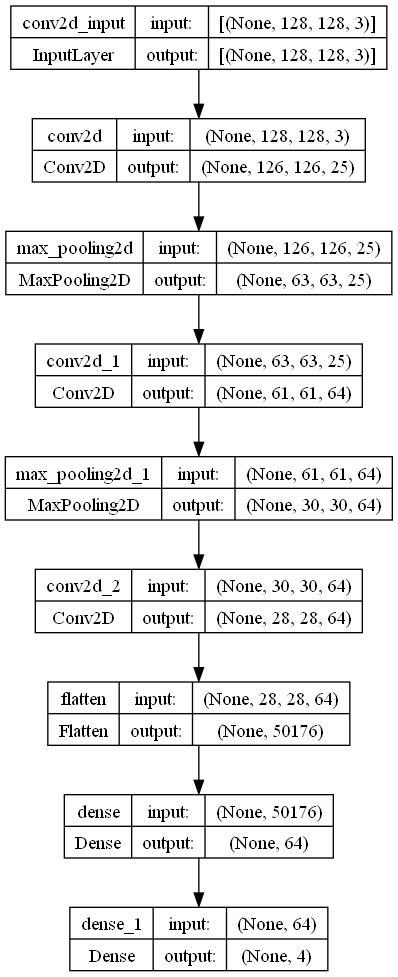

In [8]:
plot_model(model_1, to_file = './images/arquitetura01_RGB.png', show_shapes = True)

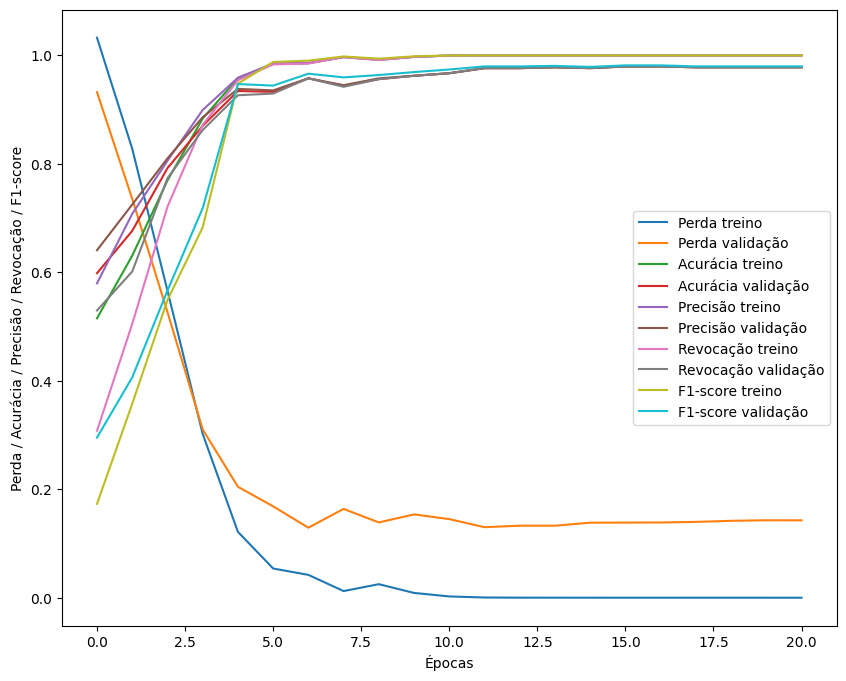

In [9]:
# Plota os gráficos de perda e acurácia
plt.figure(figsize = (10, 8))
plt.plot(history_model_1.history['loss'], label='Perda treino')
plt.plot(history_model_1.history['val_loss'], label='Perda validação')
plt.plot(history_model_1.history['accuracy'], label='Acurácia treino')
plt.plot(history_model_1.history['val_accuracy'], label='Acurácia validação')
plt.plot(history_model_1.history['precision'], label='Precisão treino')
plt.plot(history_model_1.history['val_precision'], label='Precisão validação')
plt.plot(history_model_1.history['recall'], label='Revocação treino')
plt.plot(history_model_1.history['val_recall'], label='Revocação validação')
plt.plot(history_model_1.history['f1_score'], label='F1-score treino')
plt.plot(history_model_1.history['val_f1_score'], label='F1-score validação')
plt.xlabel('Épocas')
plt.ylabel('Perda / Acurácia / Precisão / Revocação / F1-score')
plt.legend()
plt.savefig('images\modelo01_grafico_RGB.png', format='png')
plt.show()

In [10]:
# Define a arquitetura da CNN
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

In [11]:
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = METRICS)

# Treina o modelo
history_model_2 = model_2.fit(X_train, y_train_categorical, epochs = EPOCHS, validation_data = dataset_validation_categorical, callbacks=[early_stop])

Epoch 1/30
140/140 [==============================] - 135s 948ms/step - loss: 0.9658 - accuracy: 0.5469 - precision: 0.7465 - recall: 0.5134 - f1_score: 0.4803 - val_loss: 0.8489 - val_accuracy: 0.5828 - val_precision: 0.7083 - val_recall: 0.4250 - val_f1_score: 0.2416
Epoch 2/30
140/140 [==============================] - 128s 915ms/step - loss: 0.7125 - accuracy: 0.6962 - precision: 0.7501 - recall: 0.6078 - f1_score: 0.4383 - val_loss: 0.7624 - val_accuracy: 0.6422 - val_precision: 0.6621 - val_recall: 0.6000 - val_f1_score: 0.3403
Epoch 3/30
140/140 [==============================] - 129s 921ms/step - loss: 0.3484 - accuracy: 0.8589 - precision: 0.8769 - recall: 0.8408 - f1_score: 0.6599 - val_loss: 0.3366 - val_accuracy: 0.8578 - val_precision: 0.8775 - val_recall: 0.8391 - val_f1_score: 0.8586
Epoch 4/30
140/140 [==============================] - 129s 919ms/step - loss: 0.1380 - accuracy: 0.9509 - precision: 0.9551 - recall: 0.9487 - f1_score: 0.9525 - val_loss: 0.2295 - val_accur

In [12]:
# Avaliar o modelo no conjunto de teste
result_model_2 = model_2.evaluate(X_test, y_test_categorical)
print('Test:', result_model_2)

40/40 [==============================] - 8s 192ms/step - loss: 0.0911 - accuracy: 0.9805 - precision: 0.9805 - recall: 0.9797 - f1_score: 0.9805
Test: [0.09110518544912338, 0.98046875, 0.9804534912109375, 0.979687511920929, 0.9805219173431396]


In [13]:
loss, accuracy, precision, recall, f1_score  = result_model_2
Modelos.append('Modelo02')
Acuracia.append(accuracy)
Loss.append(loss)
Precisao.append(precision)
Revocacao.append(recall)
F1_score.append(f1_score)

In [14]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 50176)            

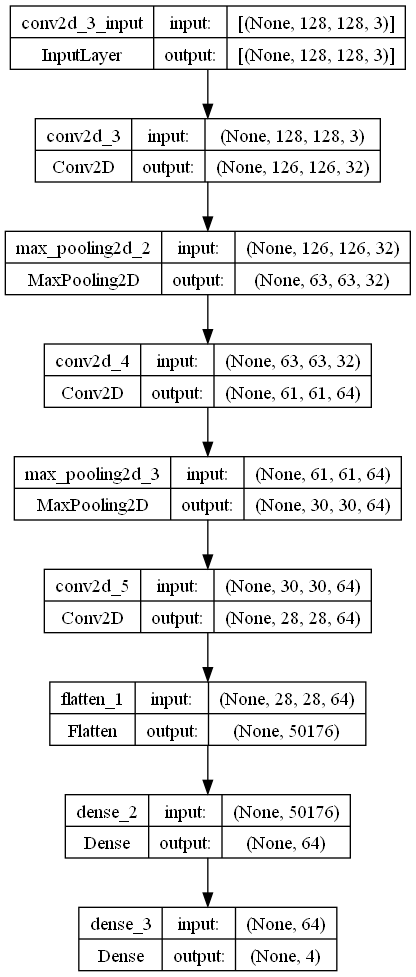

In [15]:
plot_model(model_2, to_file = './images/arquitetura02_RGB.png', show_shapes = True)

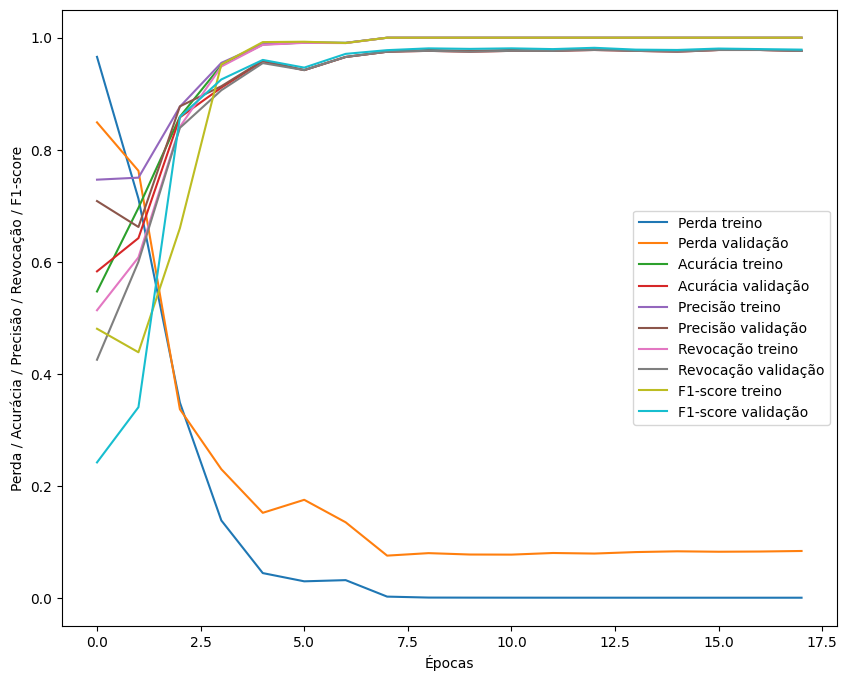

In [16]:
# Plota os gráficos de perda e acurácia
plt.figure(figsize = (10, 8))
plt.plot(history_model_2.history['loss'], label='Perda treino')
plt.plot(history_model_2.history['val_loss'], label='Perda validação')
plt.plot(history_model_2.history['accuracy'], label='Acurácia treino')
plt.plot(history_model_2.history['val_accuracy'], label='Acurácia validação')
plt.plot(history_model_2.history['precision'], label='Precisão treino')
plt.plot(history_model_2.history['val_precision'], label='Precisão validação')
plt.plot(history_model_2.history['recall'], label='Revocação treino')
plt.plot(history_model_2.history['val_recall'], label='Revocação validação')
plt.plot(history_model_2.history['f1_score'], label='F1-score treino')
plt.plot(history_model_2.history['val_f1_score'], label='F1-score validação')
plt.xlabel('Épocas')
plt.ylabel('Perda / Acurácia / Precisão / Revocação / F1-score')
plt.legend()
plt.savefig('images\modelo02_grafico_RGB.png', format='png')
plt.show()

In [3]:
# Define a arquitetura da CNN
model_3 = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(32, (2,2), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(4, activation='softmax')
])

In [4]:
model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = METRICS)

# Treina o modelo
history_model_3 = model_3.fit(X_train, y_train_categorical, epochs = EPOCHS, validation_data = dataset_validation_categorical, callbacks=[early_stop])

Epoch 1/30
140/140 [==============================] - 73s 512ms/step - loss: 1.0409 - accuracy: 0.4922 - precision: 0.5450 - recall: 0.2949 - f1_score: 0.1518 - val_loss: 0.9961 - val_accuracy: 0.5125 - val_precision: 0.6724 - val_recall: 0.3047 - val_f1_score: 0.1598
Epoch 2/30
140/140 [==============================] - 111s 795ms/step - loss: 0.9122 - accuracy: 0.5569 - precision: 0.6758 - recall: 0.3616 - f1_score: 0.2301 - val_loss: 0.8554 - val_accuracy: 0.5953 - val_precision: 0.6591 - val_recall: 0.5016 - val_f1_score: 0.3161
Epoch 3/30
140/140 [==============================] - 85s 607ms/step - loss: 0.7594 - accuracy: 0.6605 - precision: 0.7185 - recall: 0.5504 - f1_score: 0.4187 - val_loss: 0.7289 - val_accuracy: 0.6516 - val_precision: 0.6837 - val_recall: 0.6078 - val_f1_score: 0.4342
Epoch 4/30
140/140 [==============================] - 82s 578ms/step - loss: 0.5301 - accuracy: 0.7844 - precision: 0.8134 - recall: 0.7484 - f1_score: 0.5782 - val_loss: 0.5049 - val_accuracy

In [5]:
# Avaliar o modelo no conjunto de teste
result_model_3 = model_3.evaluate(X_test, y_test_categorical)
print('Test:', result_model_3)

40/40 [==============================] - 4s 95ms/step - loss: 0.1319 - accuracy: 0.9711 - precision: 0.9711 - recall: 0.9711 - f1_score: 0.9722
Test: [0.13188128173351288, 0.9710937738418579, 0.9710937738418579, 0.9710937738418579, 0.972245991230011]


In [6]:
loss, accuracy, precision, recall, f1_score  = result_model_3
Modelos.append('Modelo03')
Acuracia.append(accuracy)
Loss.append(loss)
Precisao.append(precision)
Revocacao.append(recall)
F1_score.append(f1_score)

In [7]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        4128      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

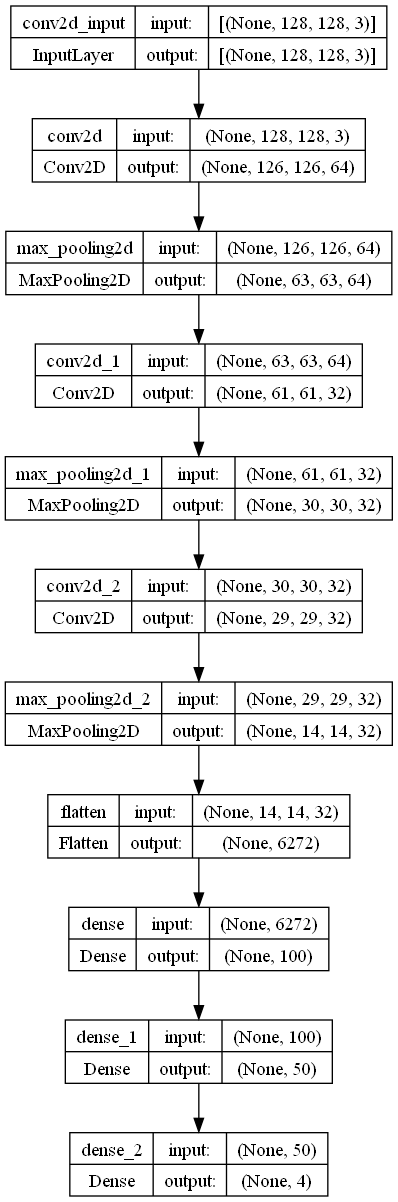

In [8]:
plot_model(model_3, to_file = './images/arquitetura03_RGB.png', show_shapes = True)

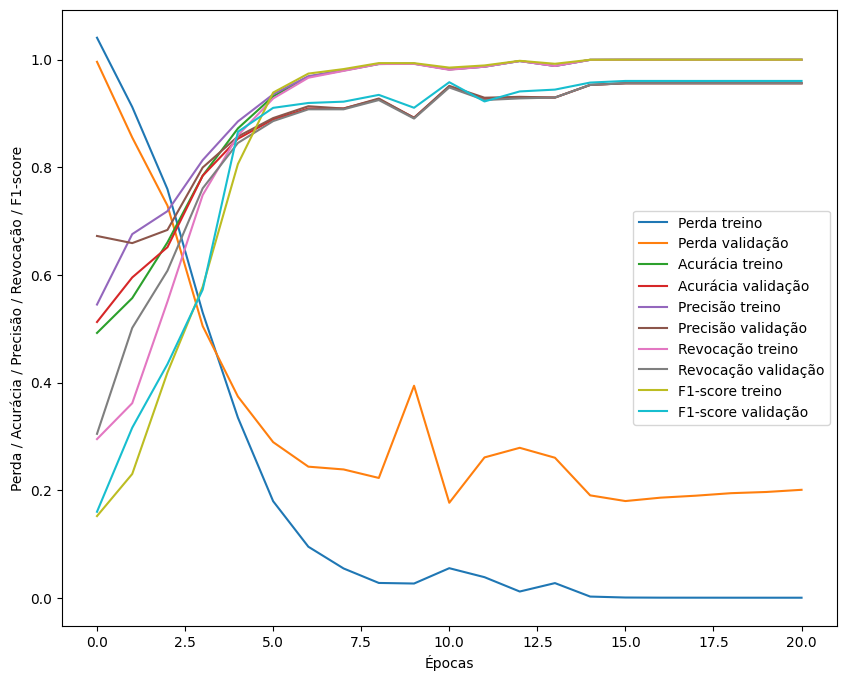

In [9]:
# Plota os gráficos de perda e acurácia
plt.figure(figsize = (10, 8))
plt.plot(history_model_3.history['loss'], label='Perda treino')
plt.plot(history_model_3.history['val_loss'], label='Perda validação')
plt.plot(history_model_3.history['accuracy'], label='Acurácia treino')
plt.plot(history_model_3.history['val_accuracy'], label='Acurácia validação')
plt.plot(history_model_3.history['precision'], label='Precisão treino')
plt.plot(history_model_3.history['val_precision'], label='Precisão validação')
plt.plot(history_model_3.history['recall'], label='Revocação treino')
plt.plot(history_model_3.history['val_recall'], label='Revocação validação')
plt.plot(history_model_3.history['f1_score'], label='F1-score treino')
plt.plot(history_model_3.history['val_f1_score'], label='F1-score validação')
plt.xlabel('Épocas')
plt.ylabel('Perda / Acurácia / Precisão / Revocação / F1-score')
plt.legend()
plt.savefig('images\modelo03_grafico_RGB.png', format='png')
plt.show()

In [10]:
model_4 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

In [11]:
model_4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = METRICS)

# Treina o modelo
history_model_4 = model_4.fit(X_train, y_train_categorical, epochs = EPOCHS, validation_data = dataset_validation_categorical, callbacks=[early_stop])

Epoch 1/30
140/140 [==============================] - 77s 530ms/step - loss: 1.0398 - accuracy: 0.5112 - precision: 0.7265 - recall: 0.4469 - f1_score: 0.4416 - val_loss: 0.9402 - val_accuracy: 0.5813 - val_precision: 0.8263 - val_recall: 0.2453 - val_f1_score: 0.1705
Epoch 2/30
140/140 [==============================] - 79s 565ms/step - loss: 0.8830 - accuracy: 0.5920 - precision: 0.6883 - recall: 0.4170 - f1_score: 0.2912 - val_loss: 0.8512 - val_accuracy: 0.5984 - val_precision: 0.6737 - val_recall: 0.4484 - val_f1_score: 0.2235
Epoch 3/30
140/140 [==============================] - 75s 533ms/step - loss: 0.7358 - accuracy: 0.6721 - precision: 0.7354 - recall: 0.5652 - f1_score: 0.4321 - val_loss: 0.6785 - val_accuracy: 0.7016 - val_precision: 0.7800 - val_recall: 0.5984 - val_f1_score: 0.4556
Epoch 4/30
140/140 [==============================] - 74s 528ms/step - loss: 0.5314 - accuracy: 0.7783 - precision: 0.8145 - recall: 0.7321 - f1_score: 0.5714 - val_loss: 0.4792 - val_accuracy:

In [12]:
# Avaliar o modelo no conjunto de teste
result_model_4 = model_4.evaluate(X_test, y_test_categorical)
print('Test:', result_model_4)

40/40 [==============================] - 5s 130ms/step - loss: 0.0997 - accuracy: 0.9688 - precision: 0.9695 - recall: 0.9688 - f1_score: 0.9708
Test: [0.09965682774782181, 0.96875, 0.9695074558258057, 0.96875, 0.9707825779914856]


In [13]:
loss, accuracy, precision, recall, f1_score  = result_model_4
Modelos.append('Modelo04')
Acuracia.append(accuracy)
Loss.append(loss)
Precisao.append(precision)
Revocacao.append(recall)
F1_score.append(f1_score)

In [14]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)     

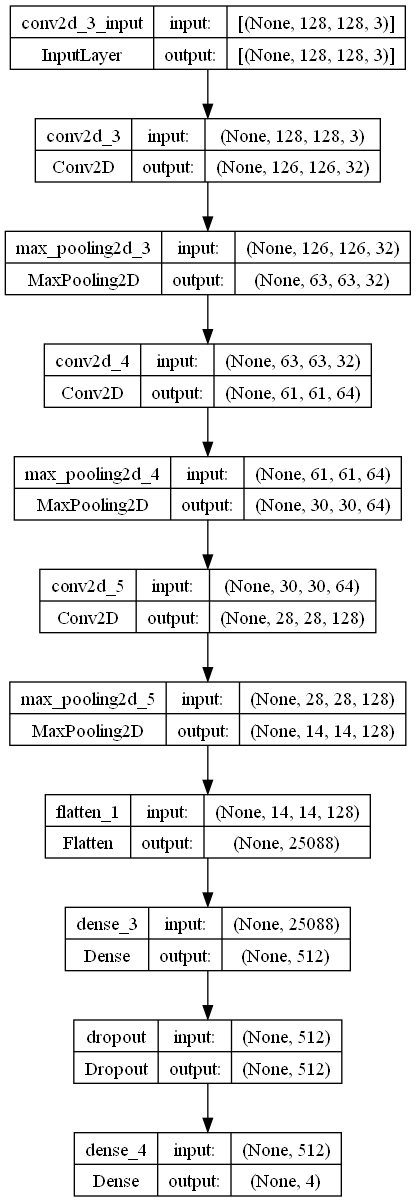

In [15]:
plot_model(model_4, to_file = './images/arquitetura04_RGB.png', show_shapes = True)

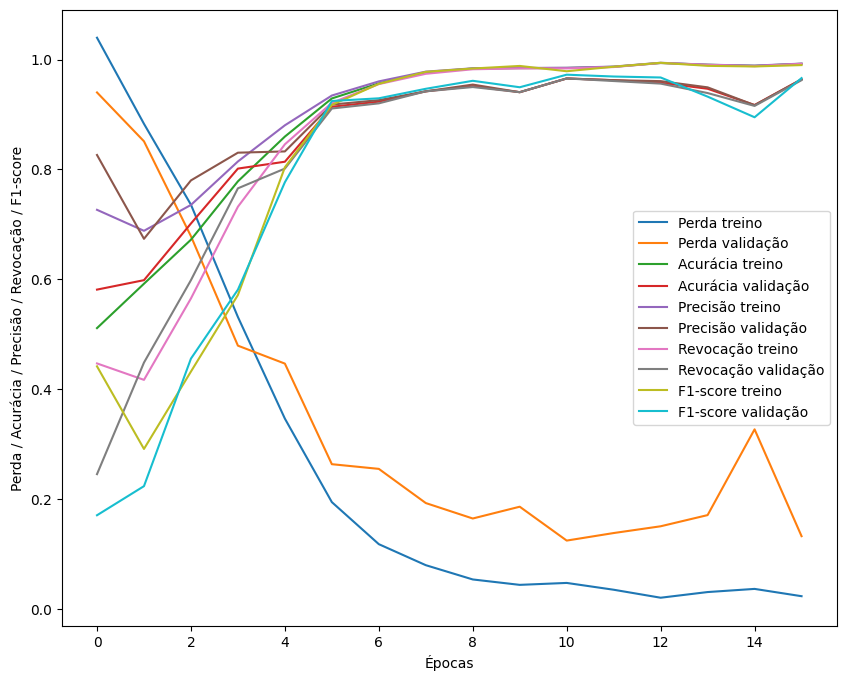

In [16]:
# Plota os gráficos de perda e acurácia
plt.figure(figsize = (10, 8))
plt.plot(history_model_4.history['loss'], label='Perda treino')
plt.plot(history_model_4.history['val_loss'], label='Perda validação')
plt.plot(history_model_4.history['accuracy'], label='Acurácia treino')
plt.plot(history_model_4.history['val_accuracy'], label='Acurácia validação')
plt.plot(history_model_4.history['precision'], label='Precisão treino')
plt.plot(history_model_4.history['val_precision'], label='Precisão validação')
plt.plot(history_model_4.history['recall'], label='Revocação treino')
plt.plot(history_model_4.history['val_recall'], label='Revocação validação')
plt.plot(history_model_4.history['f1_score'], label='F1-score treino')
plt.plot(history_model_4.history['val_f1_score'], label='F1-score validação')
plt.xlabel('Épocas')
plt.ylabel('Perda / Acurácia / Precisão / Revocação / F1-score')
plt.legend()
plt.savefig('images\modelo04_grafico_RGB.png', format='png')
plt.show()